## 휴먼지능정보공학과 201910803 박채희 HW11주차 강의

In [1]:
%%writefile src/MyBank.sol
pragma solidity ^0.5.0;

contract Bank {
    address owner;
    uint balance;
    constructor() public {
        owner = msg.sender;
        balance = 0;
    }
    event Sent(address from, address to, uint amount);
    //function send(address payable _receiver, uint _amount) public payable {
    function forwardTo(address payable _receiver) public payable{
        balance -= 333;
        require(_receiver.send(333));
    }
    
    function getBalance() public view returns(uint, uint) {
        return (balance, address(this).balance);
    }
    function deposit(uint amount) public payable {
        require(msg.value == amount);
        balance += amount;
    }
    function widthdrawAll() public {
        balance -= address(this).balance;
        require(msg.sender == owner);
        msg.sender.transfer(address(this).balance);
    }
}

Overwriting src/MyBank.sol


In [2]:
!solc --gas --abi --bin src/MyBank.sol


======= src/MyBank.sol:Bank =======
Gas estimation:
construction:
   25470 + 143600 = 169070
external:
   deposit(uint256):	20520
   forwardTo(address):	infinite
   getBalance():	841
   widthdrawAll():	infinite
Binary: 
608060405234801561001057600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060006001819055506102ce806100686000396000f3fe608060405260043610610062576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806312065fe01461006757806327d8ad88146100995780633c459375146100dd578063b6b55f25146100f4575b600080fd5b34801561007357600080fd5b5061007c610122565b604051808381526020018281526020019250505060405180910390f35b6100db600480360360208110156100af57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610148565b005b3480156100e957600080fd5b506100f261019f565b005b6101206004803603602081101561010a57600080fd5b8101908080359060200190929190505050610

In [5]:
%%writefile src/BankDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"getBalance","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"forwardTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[],"name":"widthdrawAll","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _bin="608060405234801561001057600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060006001819055506102ce806100686000396000f3fe608060405260043610610062576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806312065fe01461006757806327d8ad88146100995780633c459375146100dd578063b6b55f25146100f4575b600080fd5b34801561007357600080fd5b5061007c610122565b604051808381526020018281526020019250505060405180910390f35b6100db600480360360208110156100af57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610148565b005b3480156100e957600080fd5b506100f261019f565b005b6101206004803603602081101561010a57600080fd5b8101908080359060200190929190505050610281565b005b6000806001543073ffffffffffffffffffffffffffffffffffffffff1631915091509091565b61014d6001600082825403925050819055508073ffffffffffffffffffffffffffffffffffffffff166108fc61014d9081150290604051600060405180830381858888f19350505050151561019c57600080fd5b50565b3073ffffffffffffffffffffffffffffffffffffffff16316001600082825403925050819055506000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561022157600080fd5b3373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f1935050505015801561027e573d6000803e3d6000fd5b50565b803414151561028f57600080fd5b806001600082825401925050819055505056fea165627a7a723058203bf5cda9c9045b8b8010029a475f40087abab5bbd39465297c4d662c89bc48860029";
var _contract = new web3.eth.Contract(_abiArray);
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x136F2fE8F304B011B05cFeB27076F457d52B41b2", gas: 2000000, gasPrice: '100000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/BankDeploy.js


In [6]:
!node src/BankDeploy.js

0x358eD50A75F418d8A2B61C50D632A4Ee093235E7


### - 입금 11111 wei, 222 wei를 하고 잔고 11333 wei 출력


In [7]:
%%writefile src/BankUse1.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var _abiArray=[{"constant":true,"inputs":[],"name":"getBalance","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"forwardTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[],"name":"widthdrawAll","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var bank =new web3.eth.Contract(_abiArray,'0x358eD50A75F418d8A2B61C50D632A4Ee093235E7');
var filter = bank.events.Sent(function (error, result) {
  if (!error)
    console.log(result);
});
bank.methods.deposit(11111).send({from:"0x136F2fE8F304B011B05cFeB27076F457d52B41b2",gas:80000,value:11111});
bank.methods.deposit(222).send({from:"0x136F2fE8F304B011B05cFeB27076F457d52B41b2",gas:80000,value:222});
bank.methods.getBalance().call().then(console.log);

Overwriting src/BankUse1.js


In [8]:
!node src/BankUse1.js 

Result { '0': '0', '1': '0' }


In [9]:
!node src/BankUse1.js

Result { '0': '11333', '1': '11333' }



### - 자신의 2번째 계정으로 계좌이체 333 wei하고 컨트랙 잔고 11000 wei 출력, 자신의 2번째 계정 잔고 증가분 (+333 wei) 출력


In [13]:
%%writefile src/BankUse2.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var _abiArray=[{"constant":true,"inputs":[],"name":"getBalance","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"forwardTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[],"name":"widthdrawAll","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var bank =new web3.eth.Contract(_abiArray,'0x358eD50A75F418d8A2B61C50D632A4Ee093235E7');

bank.methods.forwardTo("0xA356a1987e3433267e5eC1D8B940EB40675e9A52").send({from:"0x136F2fE8F304B011B05cFeB27076F457d52B41b2",gas:80000});
bank.methods.getBalance().call().then(console.log);

Overwriting src/BankUse2.js


In [14]:
!node src/BankUse2.js

Result { '0': '22666', '1': '22666' }


2배가 되었고 그 뒤로 bankuse1을 하니 333이 줄어드는 모습이다..

In [15]:
!node src/BankUse1.js 

Result { '0': '22333', '1': '22333' }


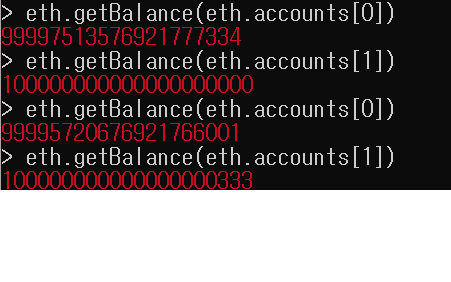

In [16]:
from IPython.display import Image
Image("ca.png")

### - 전액 인출하고 11000 wei, 자신의 잔고 증가분 출력 (+11000 wei)

In [19]:
%%writefile src/BankUse3.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var _abiArray=[{"constant":true,"inputs":[],"name":"getBalance","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"forwardTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[],"name":"widthdrawAll","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var bank =new web3.eth.Contract(_abiArray,'0x358eD50A75F418d8A2B61C50D632A4Ee093235E7');
bank.methods.widthdrawAll().send({from:"0x136F2fE8F304B011B05cFeB27076F457d52B41b2",gas:80000});
bank.methods.getBalance().call().then(console.log);

Overwriting src/BankUse3.js


In [20]:
!node src/BankUse3.js 

Result { '0': '33666', '1': '33666' }


In [21]:
!node src/BankUse3.js 

Result { '0': '0', '1': '0' }


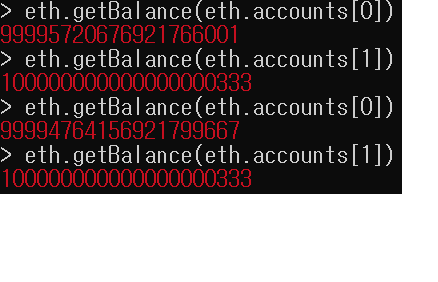

In [22]:
Image("ca2.png")

### geth 에서

In [190]:
%%writefile src/BankDeployGeth.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"getBalance","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"forwardTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[],"name":"widthdrawAll","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _bin="608060405234801561001057600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060006001819055506102ce806100686000396000f3fe608060405260043610610062576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806312065fe01461006757806327d8ad88146100995780633c459375146100dd578063b6b55f25146100f4575b600080fd5b34801561007357600080fd5b5061007c610122565b604051808381526020018281526020019250505060405180910390f35b6100db600480360360208110156100af57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610148565b005b3480156100e957600080fd5b506100f261019f565b005b6101206004803603602081101561010a57600080fd5b8101908080359060200190929190505050610281565b005b6000806001543073ffffffffffffffffffffffffffffffffffffffff1631915091509091565b61014d6001600082825403925050819055508073ffffffffffffffffffffffffffffffffffffffff166108fc61014d9081150290604051600060405180830381858888f19350505050151561019c57600080fd5b50565b3073ffffffffffffffffffffffffffffffffffffffff16316001600082825403925050819055506000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561022157600080fd5b3373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f1935050505015801561027e573d6000803e3d6000fd5b50565b803414151561028f57600080fd5b806001600082825401925050819055505056fea165627a7a723058203bf5cda9c9045b8b8010029a475f40087abab5bbd39465297c4d662c89bc48860029";
var _contract = new web3.eth.Contract(_abiArray);
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x216b3540837b945748d6bd3dcd4303c872883361", gas: 2000000, gasPrice: '100000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/BankDeployGeth.js


In [191]:
!node src/BankDeployGeth.js 

(node:2512) UnhandledPromiseRejectionWarning: Error: Transaction was not mined within 750 seconds, please make sure your transaction was properly sent. Be aware that it might still be mined!
    at Object.TransactionError (C:\Users\chaeh\Code\myProject\node_modules\web3-core-helpers\src\errors.js:96:21)
    at C:\Users\chaeh\Code\myProject\node_modules\web3-core-method\src\index.js:519:40
    at runMicrotasks (<anonymous>)
    at processTicksAndRejections (internal/process/task_queues.js:93:5)
(Use `node --trace-warnings ...` to show where the warning was created)
(node:2512) UnhandledPromiseRejectionWarning: Unhandled promise rejection. This error originated either by throwing inside of an async function without a catch block, or by rejecting a promise which was not handled with .catch(). To terminate the node process on unhandled promise rejection, use the CLI flag `--unhandled-rejections=strict` (see https://nodejs.org/api/cli.html#cli_unhandled_rejections_mode). (rejection id: 752)

geth에서는 안되는 것 같습니다...